In [32]:
import pandas as pd


In [33]:
df = pd.read_csv(r"data\Social_Media_Advertising.csv")
df.drop(["Company"], axis=1, inplace=True)

In [34]:
df.head(5)

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,2022-08-24


In [35]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

df["Acquisition_Cost"] = df["Acquisition_Cost"].replace("[$,]", "", regex=True).astype(float)

df["Duration_days"] = df["Duration"].str.extract("(\d+)").astype(float)

print(df.info())
print(df.describe())
print(df.isnull().sum())


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_31132\1991626618.py:5: SyntaxWarning: invalid escape sequence '\d'
  df["Duration_days"] = df["Duration"].str.extract("(\d+)").astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       300000 non-null  int64         
 1   Target_Audience   300000 non-null  object        
 2   Campaign_Goal     300000 non-null  object        
 3   Duration          300000 non-null  object        
 4   Channel_Used      300000 non-null  object        
 5   Conversion_Rate   300000 non-null  float64       
 6   Acquisition_Cost  300000 non-null  float64       
 7   ROI               300000 non-null  float64       
 8   Location          300000 non-null  object        
 9   Language          300000 non-null  object        
 10  Clicks            300000 non-null  int64         
 11  Impressions       300000 non-null  int64         
 12  Engagement_Score  300000 non-null  int64         
 13  Customer_Segment  300000 non-null  object        
 14  Date

In [37]:
df.head(10)

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Duration_days
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,500.0,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,15.0
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,500.0,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,15.0
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,500.0,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,15.0
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,500.0,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,15.0
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,500.0,1.422828,Austin,French,293,1937,1,Home,2022-08-24,15.0
5,323031,Women 35-44,Product Launch,15 Days,Facebook,0.02,500.0,6.900000,Austin,Spanish,500,3001,10,Technology,2022-01-15,15.0
6,727501,All Ages,Increase Sales,15 Days,Pinterest,0.10,500.0,0.679240,Los Angeles,French,293,1938,1,Home,2022-10-30,15.0
7,289553,Men 25-34,Product Launch,15 Days,Pinterest,0.10,500.0,1.009922,Miami,English,293,1938,1,Food,2022-07-23,15.0
8,942511,Men 35-44,Market Expansion,15 Days,Twitter,0.14,500.0,1.190000,Los Angeles,French,501,3003,8,Food,2022-08-14,15.0
9,255854,Women 45-60,Increase Sales,15 Days,Facebook,0.04,500.0,1.650000,Miami,English,501,3003,9,Food,2022-03-23,15.0


In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

df_eda = df.copy()

df_eda["CTR"] = np.where(df_eda["Impressions"] > 0, df_eda["Clicks"] / df_eda["Impressions"], np.nan)
df_eda["Engagement_Rate"] = np.where(
    df_eda["Impressions"] > 0, df_eda["Engagement_Score"] / df_eda["Impressions"], np.nan
)

df_eda["Year"] = df_eda["Date"].dt.year
df_eda["Month"] = df_eda["Date"].dt.month
df_eda["DayOfWeek"] = df_eda["Date"].dt.dayofweek

def agg_mean(df_in, group_col, value_col, top_n=10):
    agg = (
        df_in.groupby(group_col)[value_col]
        .mean()
        .sort_values(ascending=False)
        .reset_index()
    )
    return agg.head(top_n) if top_n else agg

channel_metrics = {
    "Conversion_Rate": agg_mean(df_eda, "Channel_Used", "Conversion_Rate"),
    "ROI": agg_mean(df_eda, "Channel_Used", "ROI"),
    "Acquisition_Cost": agg_mean(df_eda, "Channel_Used", "Acquisition_Cost"),
    "Engagement_Score": agg_mean(df_eda, "Channel_Used", "Engagement_Score"),
    "CTR": agg_mean(df_eda, "Channel_Used", "CTR"),
    "Engagement_Rate": agg_mean(df_eda, "Channel_Used", "Engagement_Rate"),
}
print("\n=== Средние метрики по каналам ===")
for name, table in channel_metrics.items():
    print(f"\n{name}")
    print(table)

print("\n=== Аудитории: ROI ===")
print(agg_mean(df_eda, "Target_Audience", "ROI"))
print("\n=== Аудитории: Conversion_Rate ===")
print(agg_mean(df_eda, "Target_Audience", "Conversion_Rate"))
print("\n=== Customer Segment: ROI ===")
print(agg_mean(df_eda, "Customer_Segment", "ROI"))
print("\n=== Customer Segment: CTR ===")
print(agg_mean(df_eda, "Customer_Segment", "CTR"))


geo_lang = (
    df_eda.groupby(["Location", "Language"])["ROI"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
print("\n=== Топ GEO + Language по ROI ===")
print(geo_lang.head(10))




=== Средние метрики по каналам ===

Conversion_Rate
  Channel_Used  Conversion_Rate
0      Twitter         0.080363
1    Pinterest         0.080042
2     Facebook         0.079870
3    Instagram         0.079764

ROI
  Channel_Used       ROI
0    Instagram  4.008786
1      Twitter  4.002236
2     Facebook  3.986930
3    Pinterest  0.716431

Acquisition_Cost
  Channel_Used  Acquisition_Cost
0      Twitter       7774.121680
1    Pinterest       7769.738763
2     Facebook       7745.022816
3    Instagram       7726.252813

Engagement_Score
  Channel_Used  Engagement_Score
0    Instagram          5.507650
1      Twitter          5.495760
2     Facebook          5.478394
3    Pinterest          1.000000

CTR
  Channel_Used       CTR
0      Twitter  0.321585
1     Facebook  0.321359
2    Instagram  0.321317
3    Pinterest  0.292396

Engagement_Rate
  Channel_Used  Engagement_Rate
0    Instagram         0.000175
1     Facebook         0.000174
2      Twitter         0.000172
3    Pinterest  

In [39]:
def barplot_metric(df_in, group_col, value_col, title, top_n=10, palette="Blues_d"):
    agg = agg_mean(df_in, group_col, value_col, top_n=top_n)
    plt.figure(figsize=(16, 8))
    sns.barplot(data=agg, x=group_col, y=value_col, palette=palette)
    plt.xticks(rotation=45, ha="right")
    plt.title(title)
    plt.tight_layout()
    plt.show()
    return agg

C:\Users\User\AppData\Local\Temp\ipykernel_31132\3504537740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg, x=group_col, y=value_col, palette=palette)


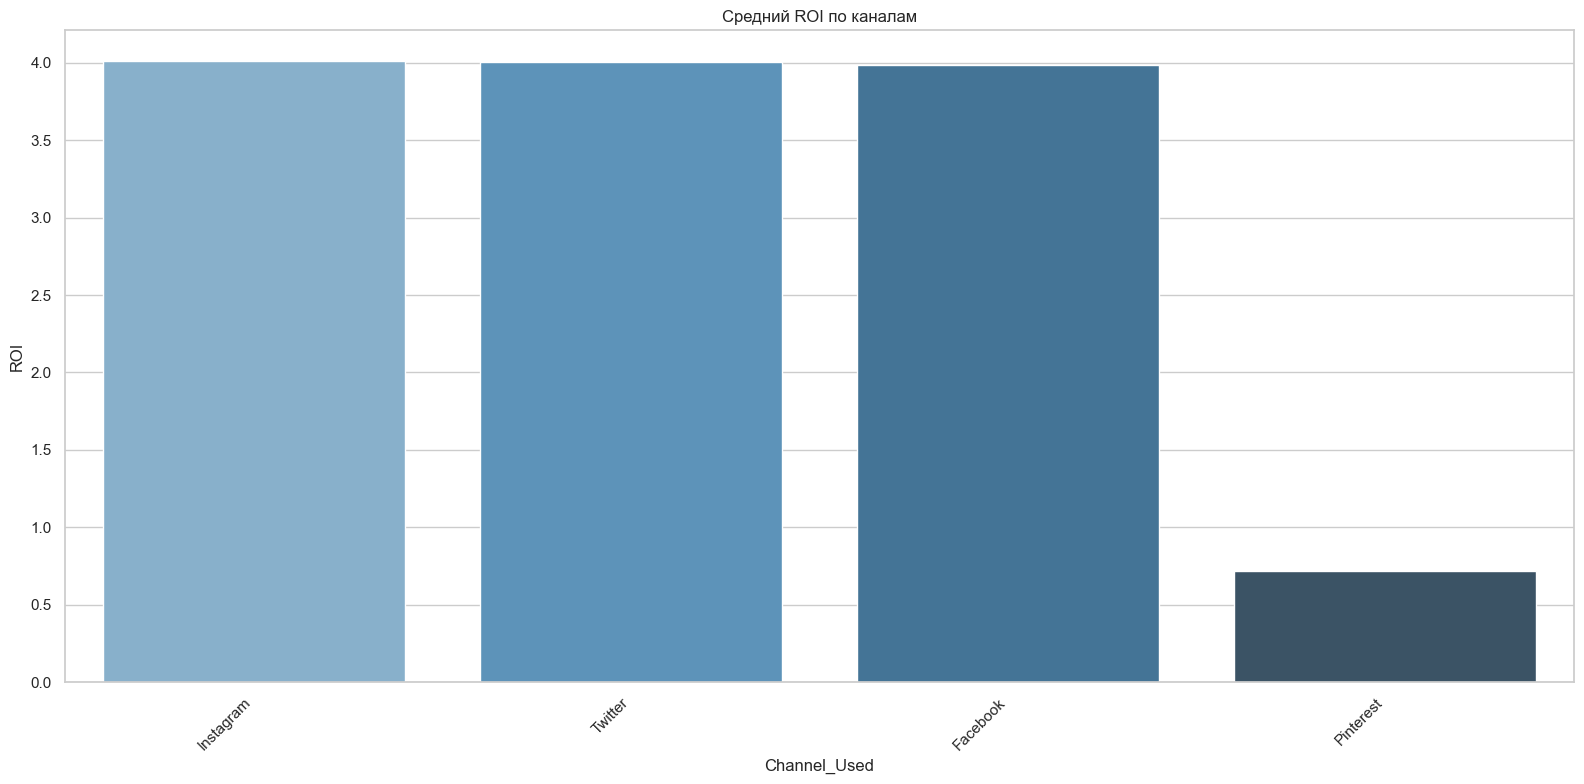

C:\Users\User\AppData\Local\Temp\ipykernel_31132\3504537740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg, x=group_col, y=value_col, palette=palette)


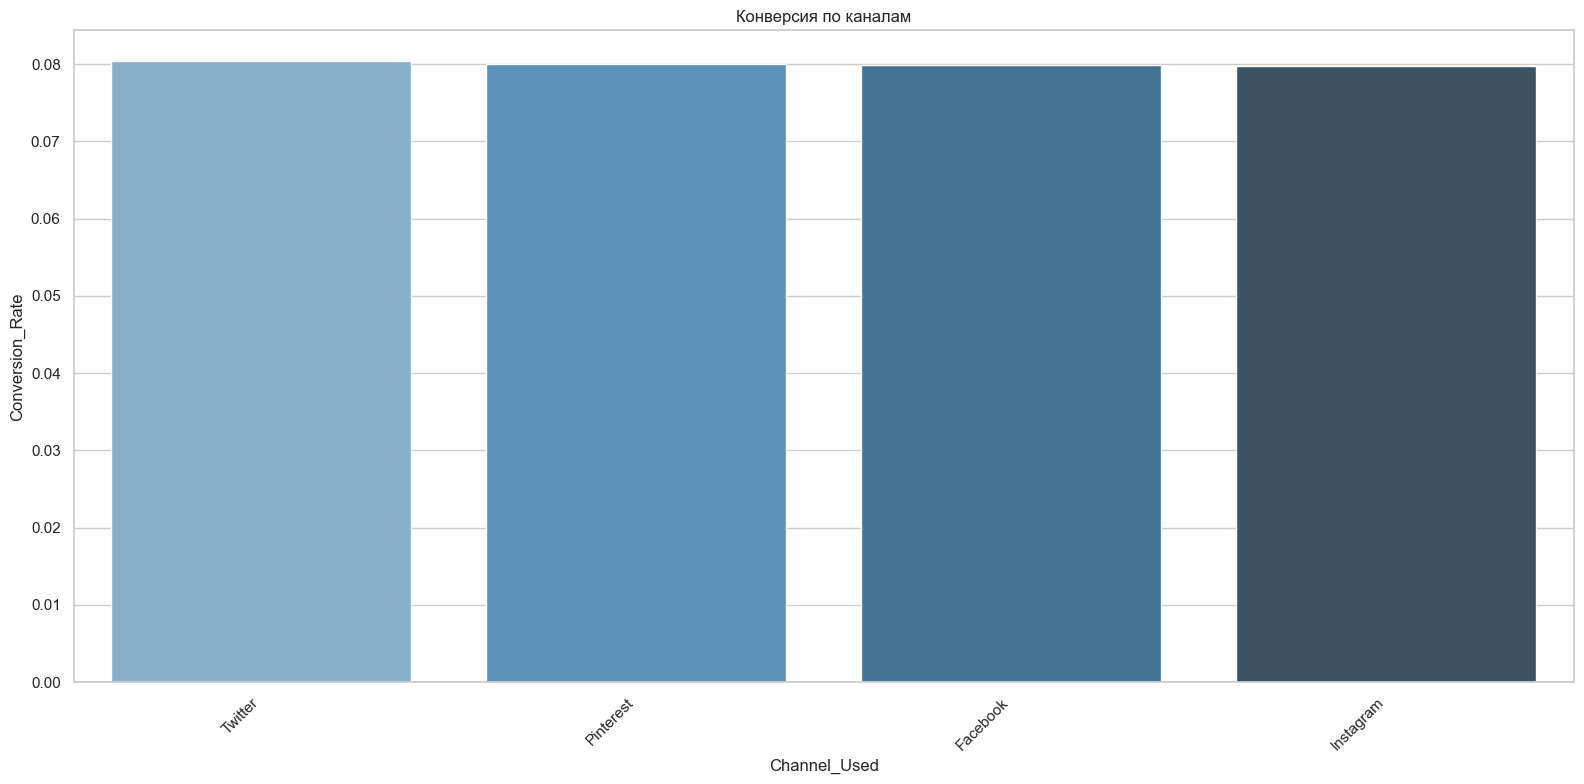

C:\Users\User\AppData\Local\Temp\ipykernel_31132\3504537740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg, x=group_col, y=value_col, palette=palette)


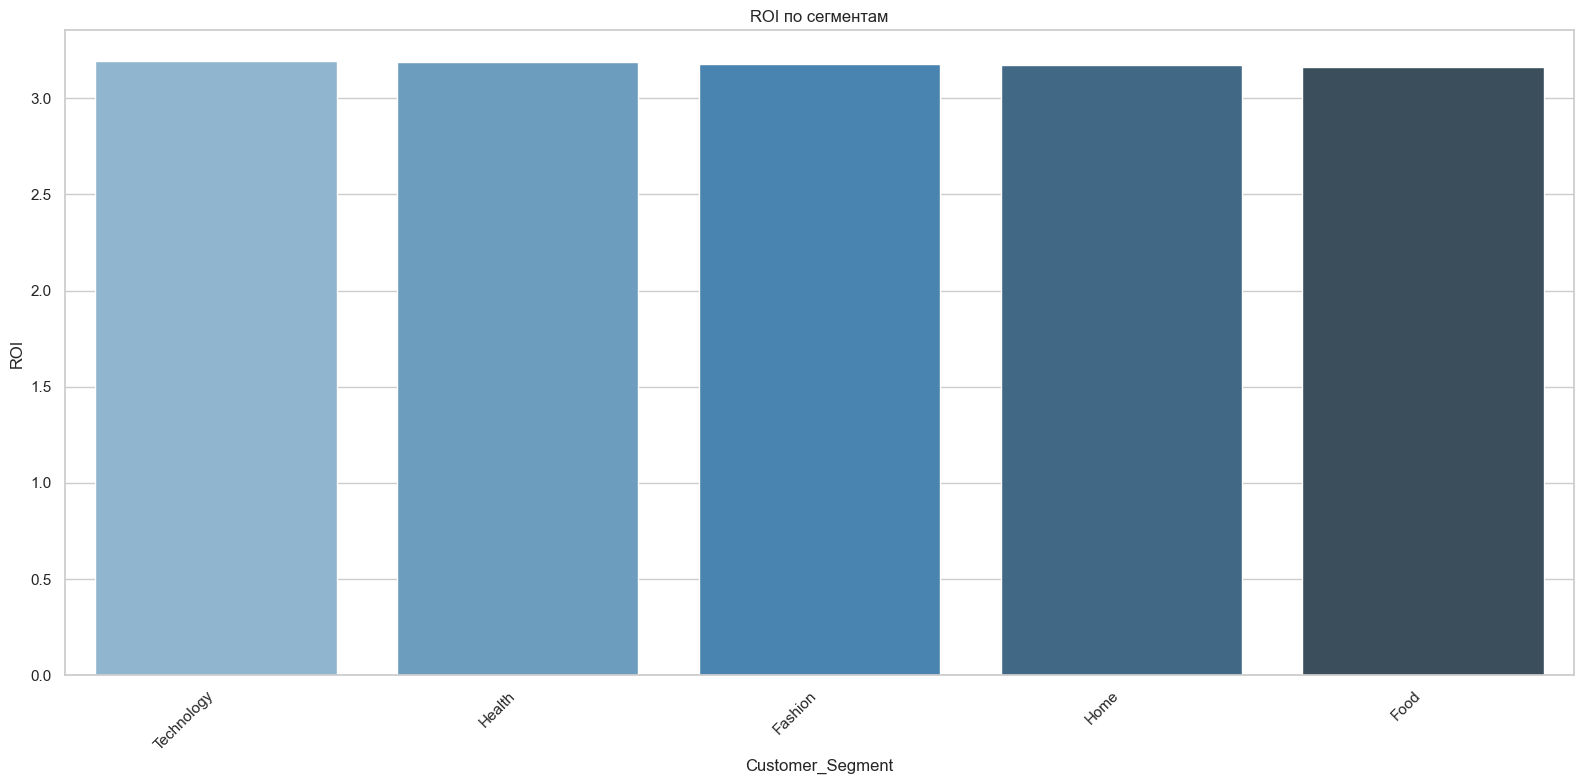

C:\Users\User\AppData\Local\Temp\ipykernel_31132\3504537740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg, x=group_col, y=value_col, palette=palette)


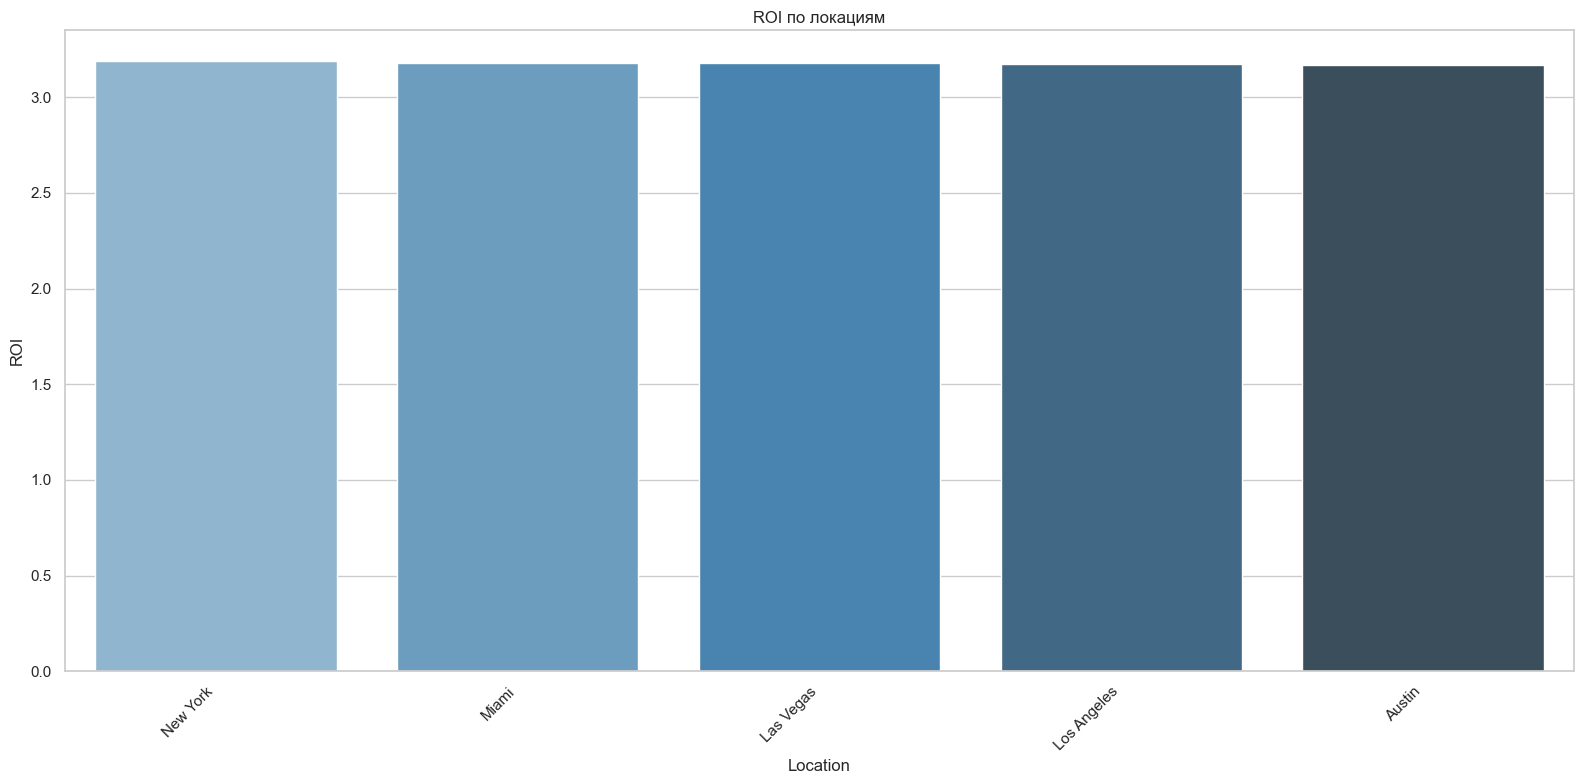

,Location,ROI
0,New York,3.189703
1,Miami,3.179352
2,Las Vegas,3.176499
3,Los Angeles,3.174227
4,Austin,3.168688


In [40]:
barplot_metric(df_eda, "Channel_Used", "ROI", "Средний ROI по каналам")
barplot_metric(df_eda, "Channel_Used", "Conversion_Rate", "Конверсия по каналам")
barplot_metric(df_eda, "Customer_Segment", "ROI", "ROI по сегментам")
barplot_metric(df_eda, "Location", "ROI", "ROI по локациям")

In [41]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [42]:

df_ml = df.copy()
print(df_ml.columns.tolist())
numeric_features = [
    "Impressions",
    "Clicks",
    "Engagement_Score",
    "Acquisition_Cost",
    "ROI",
    "Conversion_Rate"
]

categorical_features = [
    "Channel_Used",
    "Target_Audience",
    "Customer_Segment",
    "Location",
    "Language"
]

print("Числовые признаки:", numeric_features)
print("Категориальные признаки:", categorical_features)

['Campaign_ID', 'Target_Audience', 'Campaign_Goal', 'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Location', 'Language', 'Clicks', 'Impressions', 'Engagement_Score', 'Customer_Segment', 'Date', 'Duration_days']
Числовые признаки: ['Impressions', 'Clicks', 'Engagement_Score', 'Acquisition_Cost', 'ROI', 'Conversion_Rate']
Категориальные признаки: ['Channel_Used', 'Target_Audience', 'Customer_Segment', 'Location', 'Language']


In [43]:
numeric_plus = numeric_features + (["Duration_days"] if "Duration_days" in df_ml.columns else [])
cat_cols = categorical_features

models = {}  

def run_boosted(target_col, log_target=True, clip_01=False):
    blocked = {target_col, f"log_{target_col}"}
    feature_cols = [c for c in numeric_plus + cat_cols if c not in blocked]

    X = df_ml[feature_cols]
    y = df_ml[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    y_train_tr = np.log1p(y_train) if log_target else y_train
    y_test_tr = np.log1p(y_test) if log_target else y_test

    pre = ColumnTransformer([
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median"))
        ]), [c for c in numeric_plus if c not in blocked]),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ])

    model = HistGradientBoostingRegressor(
        max_depth=10,
        learning_rate=0.07,
        max_iter=400,
        l2_regularization=0.8,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.15,
    )

    pipe = Pipeline([("pre", pre), ("hgb", model)])
    pipe.fit(X_train, y_train_tr)

    preds_tr = pipe.predict(X_test)
    preds = np.expm1(preds_tr) if log_target else preds_tr
    if clip_01:
        preds = np.clip(preds, 0, 1)

    baseline_pred = np.full_like(y_test, fill_value=y_train.mean())

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)

    baseline_mse = mean_squared_error(y_test, baseline_pred)
    baseline_rmse = np.sqrt(baseline_mse)

    r2 = r2_score(y_test, preds)
    print(f"{target_col}: MAE={mae:.4f}, RMSE={rmse:.4f}, R2={r2:.4f}, baseline_RMSE={baseline_rmse:.4f}")

    models[target_col] = {
        "model": pipe,
        "feature_cols": feature_cols,
        "y_test": y_test,
        "preds": preds,
        "metrics": {
            "mae": mae,
            "rmse": rmse,
            "baseline_rmse": baseline_rmse,
            "r2": r2,
        },
    }

    return pipe


In [44]:
run_boosted("ROI", log_target=True)
run_boosted("Conversion_Rate", log_target=False, clip_01=True)
run_boosted("Acquisition_Cost", log_target=True)


ROI: MAE=1.6286, RMSE=2.0854, R2=0.2806, baseline_RMSE=2.4587
Conversion_Rate: MAE=0.0349, RMSE=0.0405, R2=0.0000, baseline_RMSE=0.0405
Acquisition_Cost: MAE=14.5370, RMSE=18.9875, R2=1.0000, baseline_RMSE=4294.2627


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Impressions', 'Clicks',
                                                   'Engagement_Score', 'ROI',
                                                   'Conversion_Rate',
                                                   'Duration_days']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Channel_Used',
                                                   'Target_Audience',
                                                   'Customer_Segment',
                                                   'Location', 'Language'])])),
                ('hgb',
                 HistGradientBoostingRegressor(early_stopping=True,
                                               l2_regularization=0.8,
                                               learning_rate=0.07, max_depth=10,
                                               max_iter=400, random_state=42,
                                               validation_fraction=0.15))])

In [45]:
from sklearn.inspection import permutation_importance
import numpy as np

roi_info = models['ROI']
roi_model = roi_info['model']
roi_features = roi_info['feature_cols']

X = df_ml[roi_features]
y = df_ml['ROI']  
pre = roi_model.named_steps['pre']
feature_names = pre.get_feature_names_out()

r = permutation_importance(
    roi_model,
    X,
    y,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importances = r.importances_mean  
top_idx = np.argsort(importances)[::-1][:10]

print('Top 10 ROI drivers (permutation importance):')
for i in top_idx:
    print(f'{feature_names[i]}: {importances[i]:.4f}')


Top 10 ROI drivers (permutation importance):
cat__Channel_Used_Facebook: 0.1953
num__Acquisition_Cost: 0.0016
num__Clicks: 0.0013
num__Conversion_Rate: 0.0005
cat__Channel_Used_Instagram: 0.0004
num__Engagement_Score: 0.0003
cat__Channel_Used_Pinterest: 0.0003
cat__Target_Audience_All Ages: 0.0002
cat__Channel_Used_Twitter: 0.0002
num__Impressions: 0.0000


In [46]:

roi_model_info = models['ROI']
roi_model = roi_model_info['model']
roi_features = roi_model_info['feature_cols']

df_ml['ROI_pred'] = roi_model.predict(df_ml[roi_features])

print('Top channels by predicted ROI:')
print(
    df_ml.groupby('Channel_Used')['ROI_pred']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

print('\nTop segments by predicted ROI:')
print(
    df_ml.groupby('Customer_Segment')['ROI_pred']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)



Top channels by predicted ROI:
Channel_Used
Instagram    1.471845
Twitter      1.471822
Facebook     1.468487
Pinterest    0.512035
Name: ROI_pred, dtype: float64

Top segments by predicted ROI:
Customer_Segment
Health        1.234061
Technology    1.231800
Fashion       1.230863
Food          1.228907
Home          1.228287
Name: ROI_pred, dtype: float64


In [47]:
df_ml["CTR"] = np.where(df_ml["Impressions"] > 0,
                        df_ml["Clicks"] / df_ml["Impressions"],
                        np.nan)

df_ml["Engagement_Rate"] = np.where(df_ml["Impressions"] > 0,
                                    df_ml["Engagement_Score"] / df_ml["Impressions"],
                                    np.nan)

In [48]:

cluster_cols = [
    'ROI', 'Conversion_Rate', 'Acquisition_Cost',
    'CTR', 'Engagement_Rate', 'Clicks',
    'Impressions', 'Engagement_Score'
]

num_df = df_ml[cluster_cols].copy()
num_df = num_df.fillna(num_df.median())

scaled = StandardScaler().fit_transform(num_df)

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df_ml['cluster'] = kmeans.fit_predict(scaled)

print(df_ml[['ROI','Conversion_Rate','Acquisition_Cost','cluster', 'Impressions']])


             ROI  Conversion_Rate  Acquisition_Cost  cluster  Impressions
0       5.790000             0.15             500.0        2         3000
1       7.210000             0.01             500.0        2         3000
2       0.430000             0.08             500.0        2         3000
3       0.909824             0.03             500.0        2         1937
4       1.422828             0.13             500.0        2         1937
...          ...              ...               ...      ...          ...
299995  4.950000             0.14           15000.0        1       119998
299996  3.410000             0.08           15000.0        1       119998
299997  0.904461             0.09           15000.0        1        77476
299998  7.430000             0.13           15000.0        1       119999
299999  1.900000             0.08           15000.0        1       120000

[300000 rows x 5 columns]


In [49]:
df_ml['cluster'].describe()

count    300000.00000
mean          0.58148
std           0.61464
min           0.00000
25%           0.00000
50%           1.00000
75%           1.00000
max           2.00000
Name: cluster, dtype: float64

## Cluster 0 - средние, базовые кампании, 

In [50]:
df_ml.groupby('cluster')[cluster_cols].mean()


,ROI,Conversion_Rate,Acquisition_Cost,CTR,Engagement_Rate,Clicks,Impressions,Engagement_Score
cluster,,,,,,,,
0,2.562736,0.080058,5330.529331,0.309033,0.000120,10820.515341,34579.461690,3.407675
1,3.779712,0.080039,11429.836567,0.328681,0.000062,28537.469661,86620.818607,5.176993
2,3.617554,0.079464,814.314073,0.254566,0.000839,2080.944304,7636.531667,5.945246


C:\Users\User\AppData\Local\Temp\ipykernel_31132\3855716645.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


,Date,ROI,Conversion_Rate,Impressions,Clicks,CTR
0,2022-01-31,3.161775,0.080250,1429768086,463206632,0.323973
1,2022-02-28,3.149323,0.079530,1304361897,422504408,0.323917
2,2022-03-31,3.189672,0.080115,1440518156,466774392,0.324032
3,2022-04-30,3.209530,0.080015,1378943897,446817060,0.324028
4,2022-05-31,3.178557,0.080360,1411080721,456922964,0.323811


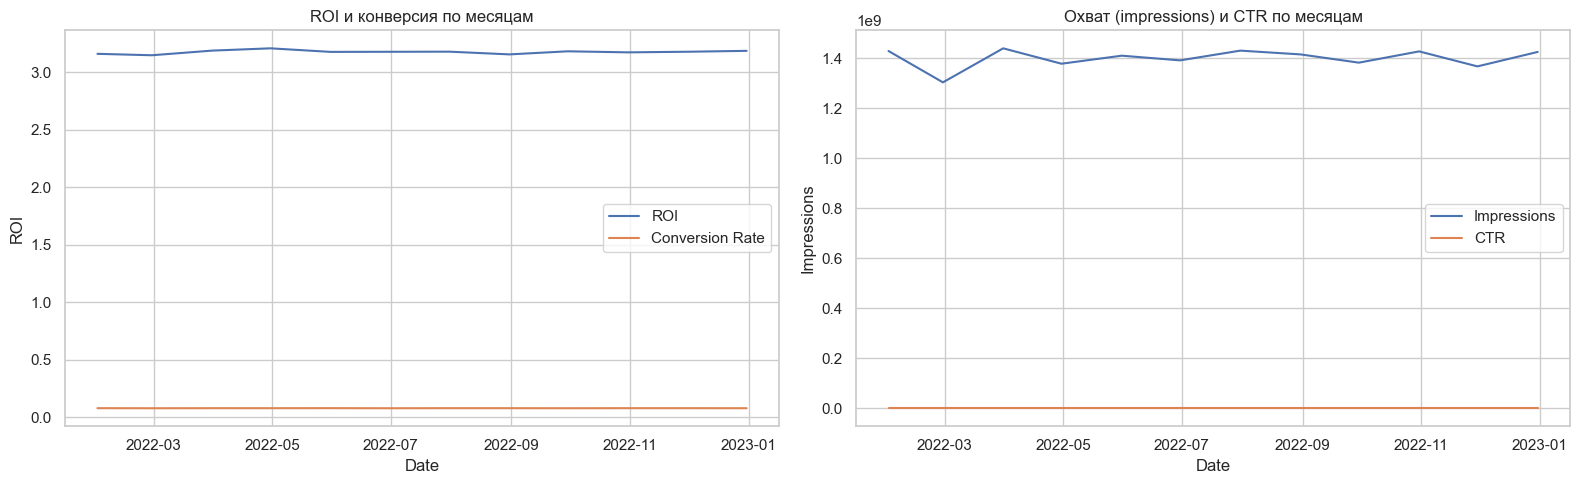

In [59]:
monthly = (
    df_ml
    .set_index('Date')
    .resample('M')
    .agg({
        'ROI': 'mean',
        'Conversion_Rate': 'mean',
        'Impressions': 'sum',
        'Clicks': 'sum'
    })
    .reset_index()
)

monthly['CTR'] = monthly['Clicks'] / monthly['Impressions']

display(monthly.head())

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(data=monthly, x='Date', y='ROI', ax=axes[0], label='ROI')
sns.lineplot(data=monthly, x='Date', y='Conversion_Rate', ax=axes[0], label='Conversion Rate')
axes[0].set_title('ROI и конверсия по месяцам')

sns.lineplot(data=monthly, x='Date', y='Impressions', ax=axes[1], label='Impressions')
sns.lineplot(data=monthly, x='Date', y='CTR', ax=axes[1], label='CTR')
axes[1].set_title('Охват (impressions) и CTR по месяцам')

plt.tight_layout()
plt.show()


,Channel_Used,Impressions,Clicks,CTR,ROI,ROI_pred,Conversion_Rate,Engagement_Rate,Acquisition_Cost,CTR_overall
0,Facebook,4617307456,1520264076,0.321359,3.986930,1.468487,0.079870,0.000174,7743.15,0.329253
3,Twitter,4603219796,1515770057,0.321585,4.002236,1.471822,0.080363,0.000172,7795.30,0.329285
1,Instagram,4602504047,1515298729,0.321317,4.008786,1.471845,0.079764,0.000175,7713.38,0.329234
2,Pinterest,2987239617,894768249,0.292396,0.716431,0.512035,0.080042,0.000049,7778.50,0.299530


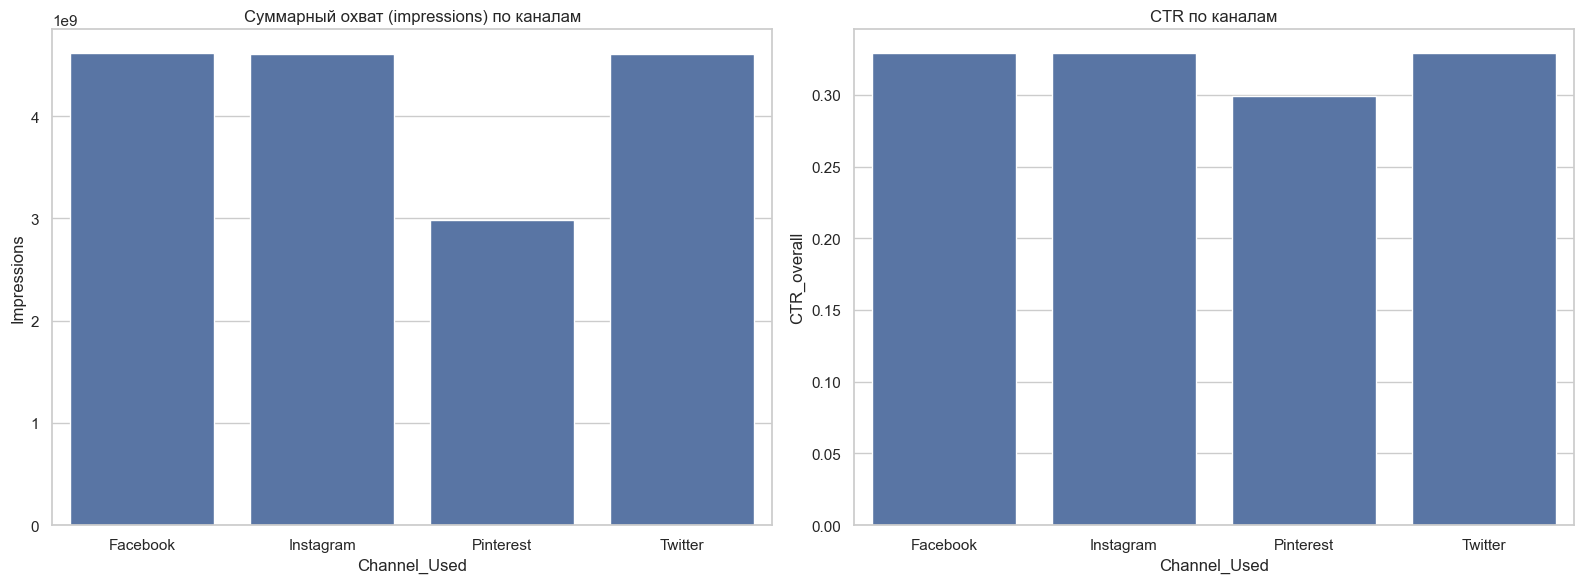

<Figure size 640x480 with 0 Axes>

In [58]:
channel_reach = (
    df_ml.groupby('Channel_Used')
    .agg({
        'Impressions': 'sum',
        'Clicks': 'sum',
        'CTR': 'mean',
        'ROI': 'mean',
        'ROI_pred': 'mean',
        'Conversion_Rate': 'mean',
        'Engagement_Rate': 'mean',
        'Acquisition_Cost': 'median'
    })
    .reset_index()
)
channel_reach['CTR_overall'] = channel_reach['Clicks'] / channel_reach['Impressions']

display(channel_reach.sort_values('Impressions', ascending=False))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=channel_reach, x='Channel_Used', y='Impressions', ax=axes[0])
axes[0].set_title('Суммарный охват (impressions) по каналам')

sns.barplot(data=channel_reach, x='Channel_Used', y='CTR_overall', ax=axes[1])
axes[1].set_title('CTR по каналам')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [53]:
def rank_channels(df_in):
    agg = (
        df_in.groupby('Channel_Used')
        .agg(
            ROI_actual=('ROI', 'mean'),
            ROI_pred=('ROI_pred', 'mean'),
            Conversion_Rate=('Conversion_Rate', 'mean'),
            Acquisition_Cost=('Acquisition_Cost', 'median'),
            Impressions=('Impressions', 'sum'),
            Clicks=('Clicks', 'sum'),
        )
        .reset_index()
    )
    agg['CTR'] = agg['Clicks'] / agg['Impressions']
    agg['score'] = agg['ROI_pred'] * agg['Conversion_Rate'].clip(lower=0)
    return agg.sort_values('score', ascending=False)

channel_rank = rank_channels(df_ml)
channel_rank.head(10)


,Channel_Used,ROI_actual,ROI_pred,Conversion_Rate,Acquisition_Cost,Impressions,Clicks,CTR,score
3,Twitter,4.002236,1.471822,0.080363,7795.30,4603219796,1515770057,0.329285,0.118280
1,Instagram,4.008786,1.471845,0.079764,7713.38,4602504047,1515298729,0.329234,0.117401
0,Facebook,3.986930,1.468487,0.079870,7743.15,4617307456,1520264076,0.329253,0.117288
2,Pinterest,0.716431,0.512035,0.080042,7778.50,2987239617,894768249,0.299530,0.040984


In [54]:
roi_model = models['ROI']['model']
roi_features = models['ROI']['feature_cols']
mode_vals = {c: df_ml[c].mode()[0] for c in cat_cols}
med_vals = df_ml.median(numeric_only=True)

def forecast_roi_by_channel(channels=None):
    channels = channels or sorted(df_ml['Channel_Used'].unique())
    rows = []
    for ch in channels:
        row = {
            'Impressions': med_vals['Impressions'],
            'Clicks': med_vals['Clicks'],
            'Engagement_Score': med_vals['Engagement_Score'],
            'Acquisition_Cost': med_vals['Acquisition_Cost'],
            'Conversion_Rate': med_vals['Conversion_Rate'],
            'Duration_days': med_vals.get('Duration_days', 0),
            'Channel_Used': ch,
            'Target_Audience': mode_vals['Target_Audience'],
            'Customer_Segment': mode_vals['Customer_Segment'],
            'Location': mode_vals['Location'],
            'Language': mode_vals['Language'],
        }
        rows.append(row)
    df_scenarios = pd.DataFrame(rows)
    preds_log = roi_model.predict(df_scenarios[roi_features])
    df_scenarios['ROI_forecast'] = np.expm1(preds_log)
    return df_scenarios[['Channel_Used', 'ROI_forecast']].sort_values('ROI_forecast', ascending=False)

forecast_roi_by_channel()


,Channel_Used,ROI_forecast
1,Instagram,3.342130
3,Twitter,3.342130
0,Facebook,3.320817
2,Pinterest,0.669802


In [57]:
def recommend_budget(total_budget, min_share=0.05, top_n=4):
    base = channel_rank.head(top_n).copy()
    weights = base['score'].clip(lower=0)
    weights = weights / weights.sum()
    weights = np.maximum(weights, min_share)
    weights = weights / weights.sum()
    base['recommended_budget'] = (weights * total_budget).round(2)
    return base[['Channel_Used', 'ROI_pred', 'Conversion_Rate', 'Acquisition_Cost', 'recommended_budget']]

budget_plan = recommend_budget(100000)
budget_plan


,Channel_Used,ROI_pred,Conversion_Rate,Acquisition_Cost,recommended_budget
3,Twitter,1.471822,0.080363,7795.30,30023.96
1,Instagram,1.471845,0.079764,7713.38,29800.64
0,Facebook,1.468487,0.079870,7743.15,29772.05
2,Pinterest,0.512035,0.080042,7778.50,10403.35
